<h1 align="center"><u>Explainability AI Project</u></h1>
<h3 align="center"><u>Clément MOLLY-MITTON  | Diane VERBECQ  |  Raphaël VIGNAL</u></h3>
<h3 align="center"><u>Paul ESCALIER</u></h3>

# Table of Contents
1. [Introduction](#introduction)
2. [Import](#imports)
3. [Data exploration and cleaning](#data-exploration-and-cleaning)
4. [Models and evaluation](#models-and-evaluation)     
5. [Conclusion](#conclusion)

# Introduction
***


# Imports
***

We import all the necessary librairy

In [33]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')

# Data Exploration and Cleaning
***

In [34]:
original_data = pd.read_csv(r'dataset\World Energy Consumption.csv', delimiter= ',')
display(original_data.info())
display(original_data.head(5))
display(original_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22012 entries, 0 to 22011
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 21.7+ MB


None

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


,year,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
count,22012.000000,1.812300e+04,1.111300e+04,1747.000000,2687.000000,2302.000000,2767.000000,5275.000000,5527.000000,5492.000000,...,6849.000000,4035.000000,2413.000000,4639.000000,4744.000000,7065.000000,7996.000000,4065.000000,6886.000000,4101.000000
mean,1974.213247,1.053096e+08,3.585114e+11,46.091694,2.719074,133.558459,38.068209,64.716800,10.966685,1.954035,...,0.622750,0.210395,267.541206,7.314174,53.422938,62.811828,17.561153,232.108949,1.404910,0.651413
std,35.058653,4.640460e+08,2.411179e+12,274.616745,10.057018,264.707851,111.623148,201.043915,47.953561,5.274155,...,2.066186,0.643304,5940.944120,37.327922,273.255306,252.734217,101.693172,733.841324,4.489043,1.893820
min,1900.000000,1.833000e+03,1.642060e+08,-100.000000,-50.843000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-100.000000,-51.208000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1946.000000,1.712404e+06,1.365898e+10,-0.616500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.029000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1984.000000,6.991543e+06,4.167411e+10,8.179000,0.000000,15.482000,0.673000,0.146000,0.010000,0.062000,...,0.000000,0.000000,20.000000,0.000000,0.005000,0.000000,0.000000,0.051000,0.000000,0.003000
75%,2003.000000,2.557688e+07,1.744295e+11,26.508500,0.861500,165.266750,13.629500,34.289000,0.690000,1.577500,...,0.095000,0.018500,47.971000,0.315000,2.357750,2.101000,0.140000,45.523000,0.372000,0.268000
max,2022.000000,7.975105e+09,1.136302e+14,5659.328000,141.131000,2588.512000,1199.207000,2514.102000,677.570000,71.429000,...,40.000000,7.586000,242384.844000,665.413000,5487.600000,3219.852000,2139.230000,8422.012000,56.840000,26.157000


In [35]:
display(original_data.columns)

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)

This is the explanation of each column of this datset
| Column | Description | Unit | Source |
|--------|------------|------|--------|
| country | Country - Geographic location. | nan | Our World in Data - Regions (2023) |
| year | Year - Year of observation. | nan | Our World in Data - Regions (2023) |
| iso_code | ISO code - ISO 3166-1 alpha-3 three-letter country codes. | nan | International Organization for Standardization - Regions (2023) |
| population | Population - Population by country, available from 10,000 BCE to 2100, based on data and estimates from different sources. | persons | Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| gdp | Gross domestic product (GDP) - This data is adjusted for inflation and differences in the cost of living between countries. | international-$ in 2011 prices | Bolt and van Zanden - Maddison Project Database 2023 (https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-project-database-2023) |
| biofuel_cons_change_pct | Annual percentage change in biofuel consumption - Includes biogasoline (such as ethanol) and biodiesel. Volumes have been adjusted for energy content. | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| biofuel_cons_change_twh | Annual change in biofuel consumption - Includes biogasoline (such as ethanol) and biodiesel. Volumes have been adjusted for energy content. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| biofuel_cons_per_capita | Biofuel consumption per capita - Measured in kilowatt-hours per person. | kilowatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| biofuel_consumption | Primary energy consumption from biofuels - Measured in terawatt-hours. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| biofuel_elec_per_capita | Electricity generation from bioenergy per person - Measured in kilowatt-hours per person. | kilowatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| biofuel_electricity | Electricity generation from bioenergy - Measured in terawatt-hours. | terawatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| biofuel_share_elec | Share of electricity generated by bioenergy - Measured as a percentage of total electricity. | % | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| biofuel_share_energy | Share of primary energy consumption that comes from biofuels - Measured as a percentage of the total primary energy, using the substitution method. | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| carbon_intensity_elec | Carbon intensity of electricity generation - Greenhouse gases emitted per unit of generated electricity, measured in grams of CO₂ equivalents per kilowatt-hour. | grams of CO₂ equivalents per kilowatt-hour | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| coal_cons_change_pct | Annual percentage change in coal consumption | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| coal_cons_change_twh | Annual change in coal consumption | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| coal_cons_per_capita | Coal consumption per capita - Measured in kilowatt-hours per person. | kilowatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| coal_consumption | Primary energy consumption from coal - Measured in terawatt-hours. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| coal_elec_per_capita | Electricity generation from coal per person - Measured in kilowatt-hours per person. | kilowatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| coal_electricity | Electricity generation from coal - Measured in terawatt-hours. | terawatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| coal_prod_change_pct | Annual change in coal production - Measured as a percentage of the previous year's production. | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); The Shift Data Portal - Energy production from fossil fuels (2019) (https://www.theshiftdataportal.org/) |
| coal_prod_change_twh | Annual change in coal production - Measured in terawatt-hours. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); The Shift Data Portal - Energy production from fossil fuels (2019) (https://www.theshiftdataportal.org/) |
| coal_prod_per_capita | Coal production per capita - Measured in kilowatt-hours per capita. | kilowatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); The Shift Data Portal - Energy production from fossil fuels (2019) (https://www.theshiftdataportal.org/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| coal_production | Coal production - Measured in terawatt-hours. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); The Shift Data Portal - Energy production from fossil fuels (2019) (https://www.theshiftdataportal.org/) |
| coal_share_elec | Share of electricity generated by coal - Measured as a percentage of total electricity. | % | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| coal_share_energy | Share of primary energy consumption that comes from coal - Measured as a percentage of the total primary energy, using the substitution method. | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| electricity_demand | Electricity demand - Measured in terawatt-hours. | terawatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| electricity_demand_per_capita | Total electricity demand per person - Measured in kilowatt-hours per person. | kilowatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| electricity_generation | Total electricity generation - Measured in terawatt-hours. | terawatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| electricity_share_energy | Total electricity generation as share of primary energy - Measured as a percentage of total, direct primary energy consumption. | % | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| energy_cons_change_pct | Annual change in primary energy consumption | % | U.S. Energy Information Administration - International Energy Data (2023) (https://www.eia.gov/opendata/bulkfiles.php); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| energy_cons_change_twh | Annual change in primary energy consumption | terawatt-hours | U.S. Energy Information Administration - International Energy Data (2023) (https://www.eia.gov/opendata/bulkfiles.php); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| energy_per_capita | Primary energy consumption per capita - Measured in kilowatt-hours per person. | kilowatt-hours per person | U.S. Energy Information Administration - International Energy Data (2023) (https://www.eia.gov/opendata/bulkfiles.php); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| energy_per_gdp | Primary energy consumption per GDP - Measured in kilowatt-hours per international-$. | kilowatt-hours per $ | U.S. Energy Information Administration - International Energy Data (2023) (https://www.eia.gov/opendata/bulkfiles.php); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Bolt and van Zanden - Maddison Project Database 2023 (https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-project-database-2023) |
| fossil_cons_change_pct | Annual percentage change in fossil fuel consumption | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| fossil_cons_change_twh | Annual change in fossil fuel consumption | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| fossil_elec_per_capita | Electricity generation from fossil fuels per person - Measured in kilowatt-hours per person. | kilowatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| fossil_electricity | Electricity generation from fossil fuels - Measured in terawatt-hours. | terawatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| fossil_energy_per_capita | Fossil fuel consumption per capita - Measured in kilowatt-hours per person. | kilowatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| fossil_fuel_consumption | Primary energy consumption from fossil fuels - Measured in terawatt-hours. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| fossil_share_elec | Share of electricity generated by fossil fuels - Measured as a percentage of total electricity. | % | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| fossil_share_energy | Share of primary energy consumption that comes from fossil fuels - Measured as a percentage of the total primary energy, using the substitution method. | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| gas_cons_change_pct | Annual percentage change in gas consumption | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| gas_cons_change_twh | Annual change in gas consumption | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| gas_consumption | Primary energy consumption from gas - Measured in terawatt-hours. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| gas_elec_per_capita | Electricity generation from gas per person - Measured in kilowatt-hours per person. | kilowatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| gas_electricity | Electricity generation from gas - Measured in terawatt-hours. | terawatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| gas_energy_per_capita | Gas consumption per capita - Measured in kilowatt-hours per person. | kilowatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| gas_prod_change_pct | Annual change in gas production - Measured as a percentage of the previous year's production. | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); The Shift Data Portal - Energy production from fossil fuels (2019) (https://www.theshiftdataportal.org/) |
| gas_prod_change_twh | Annual change in gas production - Measured in terawatt-hours. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); The Shift Data Portal - Energy production from fossil fuels (2019) (https://www.theshiftdataportal.org/) |
| gas_prod_per_capita | Gas production per capita - Measured in kilowatt-hours per capita. | kilowatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); The Shift Data Portal - Energy production from fossil fuels (2019) (https://www.theshiftdataportal.org/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| gas_production | Gas production - Measured in terawatt-hours. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); The Shift Data Portal - Energy production from fossil fuels (2019) (https://www.theshiftdataportal.org/) |
| gas_share_elec | Share of electricity generated by gas - Measured as a percentage of total electricity. | % | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| gas_share_energy | Share of primary energy consumption that comes from gas - Measured as a percentage of the total primary energy, using the substitution method. | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| greenhouse_gas_emissions | Emissions from electricity generation - Measured in megatonnes of CO₂ equivalents. | million tonnes CO₂ equivalents | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| hydro_cons_change_pct | Annual percentage change in hydropower consumption - Figures are based on gross primary hydroelectric generation and do not account for cross-border electricity supply. | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| hydro_cons_change_twh | Annual change in hydropower consumption - Input-equivalent energy is based on gross generation and does not account for cross-border electricity supply. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| hydro_consumption | Primary energy consumption from hydropower - Measured in terawatt-hours, using the substitution method. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| hydro_elec_per_capita | Electricity generation from hydropower per person - Measured in kilowatt-hours per person. | kilowatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| hydro_electricity | Electricity generation from hydropower - Measured in terawatt-hours. | terawatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| hydro_energy_per_capita | Hydropower consumption per capita - Measured in kilowatt-hours per person. | kilowatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| hydro_share_elec | Share of electricity generated by hydropower - Measured as a percentage of total electricity. | % | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| hydro_share_energy | Share of primary energy consumption that comes from hydropower - Measured as a percentage of the total primary energy, using the substitution method. | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| low_carbon_cons_change_pct | Annual percentage change in low-carbon energy consumption - Figures are based on gross generation and do not account for cross-border electricity supply. | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| low_carbon_cons_change_twh | Annual change in low-carbon energy consumption - Input-equivalent energy is based on gross generation and does not account for cross-border electricity supply. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| low_carbon_consumption | Primary energy consumption from low-carbon sources - Measured in terawatt-hours, using the substitution method. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| low_carbon_elec_per_capita | Electricity generation from low-carbon sources per person - Low-carbon sources correspond to renewables and nuclear power, that produce significantly less greenhouse-gas emissions than fossil fuels. | kilowatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| low_carbon_electricity | Electricity generation from low-carbon sources - Low-carbon sources correspond to renewables and nuclear power, that produce significantly less greenhouse-gas emissions than fossil fuels. | terawatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| low_carbon_energy_per_capita | Low-carbon energy consumption per capita - Measured in kilowatt-hours per person. | kilowatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| low_carbon_share_elec | Share of electricity generated by low-carbon sources - Low-carbon sources correspond to renewables and nuclear power, that produce significantly less greenhouse-gas emissions than fossil fuels. | % | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| low_carbon_share_energy | Share of primary energy consumption that comes from low-carbon sources - Measured as a percentage of the total primary energy, using the substitution method. | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| net_elec_imports | Net electricity imports - Electricity imports minus exports, measured in TWh. | terawatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| net_elec_imports_share_demand | Net electricity imports as a share of demand - Electricity imports minus exports, measured as a percentage of total electricity demand. | % | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| nuclear_cons_change_pct | Annual percentage change in nuclear power consumption - Figures are based on gross generation and do not account for cross-border electricity supply. | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| nuclear_cons_change_twh | Annual change in nuclear power consumption - Input-equivalent energy is based on gross generation and does not account for cross-border electricity supply. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| nuclear_consumption | Primary energy consumption from nuclear power - Measured in terawatt-hours, using the substitution method. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| nuclear_elec_per_capita | Electricity generation from nuclear power per person - Measured in kilowatt-hours per person. | kilowatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| nuclear_electricity | Electricity generation from nuclear - Measured in terawatt-hours. | terawatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| nuclear_energy_per_capita | Nuclear power consumption per capita - Measured in kilowatt-hours per person. | kilowatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| nuclear_share_elec | Share of electricity generated by nuclear power - Measured as a percentage of total electricity. | % | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| nuclear_share_energy | Share of primary energy consumption that comes from nuclear power - Measured as a percentage of the total primary energy, using the substitution method. | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| oil_cons_change_pct | Annual percentage change in oil consumption | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| oil_cons_change_twh | Annual change in oil consumption | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| oil_consumption | Primary energy consumption from oil - Measured in terawatt-hours. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| oil_elec_per_capita | Electricity generation from oil per person - Measured in kilowatt-hours per person. | kilowatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| oil_electricity | Electricity generation from oil - Measured in terawatt-hours. | terawatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| oil_energy_per_capita | Oil consumption per capita - Measured in kilowatt-hours per person. | kilowatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| oil_prod_change_pct | Annual change in oil production - Measured as a percentage of the previous year's production. | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); The Shift Data Portal - Energy production from fossil fuels (2019) (https://www.theshiftdataportal.org/) |
| oil_prod_change_twh | Annual change in oil production - Measured in terawatt-hours. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); The Shift Data Portal - Energy production from fossil fuels (2019) (https://www.theshiftdataportal.org/) |
| oil_prod_per_capita | Oil production per capita - Measured in kilowatt-hours per capita. | kilowatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); The Shift Data Portal - Energy production from fossil fuels (2019) (https://www.theshiftdataportal.org/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| oil_production | Oil production - Measured in terawatt-hours. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); The Shift Data Portal - Energy production from fossil fuels (2019) (https://www.theshiftdataportal.org/) |
| oil_share_elec | Share of electricity generated by oil - Measured as a percentage of total electricity. | % | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| oil_share_energy | Share of primary energy consumption that comes from oil - Measured as a percentage of the total primary energy, using the substitution method. | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| other_renewable_consumption | Primary energy consumption from other renewables - Measured in terawatt-hours, using the substitution method. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| other_renewable_electricity | Electricity generation from other renewables, including bioenergy - Measured in terawatt-hours. | terawatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| other_renewable_exc_biofuel_electricity | Electricity generation from other renewables, excluding bioenergy - Measured in terawatt-hours. | terawatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| other_renewables_cons_change_pct | Annual percentage change in other renewables consumption - Figures are based on gross generation and do not account for cross-border electricity supply. | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| other_renewables_cons_change_twh | Annual change in other renewables consumption - Input-equivalent energy, in terawatt-hours, is based on gross generation and does not account for cross-border electricity supply. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| other_renewables_elec_per_capita | Electricity generation from other renewables, including bioenergy, per person - Measured in kilowatt-hours per person. | kilowatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| other_renewables_elec_per_capita_exc_biofuel | Electricity generation from other renewables, excluding bioenergy, per person - Measured in kilowatt-hours per person. | kilowatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| other_renewables_energy_per_capita | Other renewables consumption per capita - Measured in kilowatt-hours per person. | kilowatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| other_renewables_share_elec | Share of electricity generated by other renewables, including bioenergy - Measured as a percentage of total electricity. | % | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| other_renewables_share_elec_exc_biofuel | Share of electricity generated by other renewables, excluding bioenergy - Measured as a percentage of total electricity. | % | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| other_renewables_share_energy | Share of primary energy consumption that comes from other renewables - Measured as a percentage of the total primary energy, using the substitution method. | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| per_capita_electricity | Total electricity generation per person - Measured in kilowatt-hours per person. | kilowatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| primary_energy_consumption | Primary energy consumption - Measured in terawatt-hours. | terawatt-hours | U.S. Energy Information Administration - International Energy Data (2023) (https://www.eia.gov/opendata/bulkfiles.php); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| renewables_cons_change_pct | Annual percentage change in renewables consumption | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| renewables_cons_change_twh | Annual change in renewables consumption | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| renewables_consumption | Primary energy consumption from renewables - Measured in terawatt-hours, using the substitution method. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| renewables_elec_per_capita | Electricity generation from renewables per person - Measured in kilowatt-hours per person. | kilowatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| renewables_electricity | Electricity generation from renewables - Measured in terawatt-hours. | terawatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| renewables_energy_per_capita | Renewables consumption per capita - Measured in kilowatt-hours per person. | kilowatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| renewables_share_elec | Share of electricity generated by renewables - Measured as a percentage of total electricity. | % | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| renewables_share_energy | Share of primary energy consumption that comes from renewables - Measured as a percentage of the total primary energy, using the substitution method. | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| solar_cons_change_pct | Annual percentage change in solar power consumption - Figures are based on gross generation and do not account for cross-border electricity supply. | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| solar_cons_change_twh | Annual change in solar power consumption - Input-equivalent energy, in terawatt-hours, is based on gross generation and does not account for cross-border electricity supply. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| solar_consumption | Primary energy consumption from solar power - Measured in terawatt-hours, using the substitution method. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| solar_elec_per_capita | Electricity generation from solar power per person - Measured in kilowatt-hours per person. | kilowatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| solar_electricity | Electricity generation from solar power - Measured in terawatt-hours. | terawatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| solar_energy_per_capita | Solar power consumption per capita - Measured in kilowatt-hours per person. | kilowatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| solar_share_elec | Share of electricity generated by solar power - Measured as a percentage of total electricity. | % | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| solar_share_energy | Share of primary energy consumption that comes from solar power - Measured as a percentage of the total primary energy, using the substitution method. | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| wind_cons_change_pct | Annual percentage change in wind power consumption - Figures are based on gross generation and do not account for cross-border electricity supply. | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| wind_cons_change_twh | Annual change in wind power consumption - Input-equivalent energy, in terawatt-hours, is based on gross generation and does not account for cross-border electricity supply. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| wind_consumption | Primary energy consumption from wind power - Measured in terawatt-hours, using the substitution method. | terawatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| wind_elec_per_capita | Electricity generation from wind power per person - Measured in kilowatt-hours per person. | kilowatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| wind_electricity | Electricity generation from wind power - Measured in terawatt-hours. | terawatt-hours | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| wind_energy_per_capita | Wind power consumption per capita - Measured in kilowatt-hours per person. | kilowatt-hours | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/); Population based on various sources (2023) (https://ourworldindata.org/population-sources) |
| wind_share_elec | Share of electricity generated by wind power - Measured as a percentage of total electricity. | % | Ember - Yearly Electricity Data (2024) (https://ember-climate.org/data-catalogue/yearly-electricity-data/); Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |
| wind_share_energy | Share of primary energy consumption that comes from wind power - Measured as a percentage of the total primary energy, using the substitution method. | % | Energy Institute - Statistical Review of World Energy (2024) (https://www.energyinst.org/statistical-review/) |


based on https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv we will keep only the relevant colulumn for us and we will clean the data

In [36]:
column_to_keep = [
    # Basic info per country
    "country",
    "year",
    "iso_code",
    "population",
    "gdp", # PIB

    # Annual electricity generation
    "biofuel_electricity",
    "coal_electricity",
    "fossil_electricity",
    "gas_electricity",
    "hydro_electricity",
    "nuclear_electricity",
    "oil_electricity",
    "solar_electricity",
    "wind_electricity",

    # Electricity generation per person
    "biofuel_elec_per_capita",
    "coal_elec_per_capita",
    "fossil_elec_per_capita",
    "gas_elec_per_capita",
    "hydro_elec_per_capita",
    "nuclear_elec_per_capita",
    "oil_elec_per_capita",
    "solar_elec_per_capita",
    "wind_energy_per_capita",

    # Carbon and gas emission
    "carbon_intensity_elec",
    "greenhouse_gas_emissions",
]

So the explanation of the selected columns is:
| Column | Description | Unit | Source |
|--------|------------|------|--------|
| country | Country - Geographic location. | nan | Our World in Data - Regions (2023) |
| year | Year - Year of observation. | nan | Our World in Data - Regions (2023) |
| iso_code | ISO code - ISO 3166-1 alpha-3 three-letter country codes. | nan | International Organization for Standardization - Regions (2023) |
| population | Population - Population by country, available from 10,000 BCE to 2100, based on data and estimates from different sources. | persons | [Population based on various sources (2023)](https://ourworldindata.org/population-sources) |
| gdp | Gross domestic product (GDP) - This data is adjusted for inflation and differences in the cost of living between countries. | international-$ in 2011 prices | [Maddison Project Database 2023](https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-project-database-2023) |
| biofuel_electricity | Electricity generation from bioenergy - Measured in terawatt-hours. | terawatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| coal_electricity | Electricity generation from coal - Measured in terawatt-hours. | terawatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| fossil_electricity | Electricity generation from fossil fuels - Measured in terawatt-hours. | terawatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| gas_electricity | Electricity generation from gas - Measured in terawatt-hours. | terawatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| hydro_electricity | Electricity generation from hydropower - Measured in terawatt-hours. | terawatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| nuclear_electricity | Electricity generation from nuclear - Measured in terawatt-hours. | terawatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| oil_electricity | Electricity generation from oil - Measured in terawatt-hours. | terawatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| solar_electricity | Electricity generation from solar power - Measured in terawatt-hours. | terawatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| wind_electricity | Electricity generation from wind power - Measured in terawatt-hours. | terawatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| biofuel_elec_per_capita | Electricity generation from bioenergy per person - Measured in kilowatt-hours per person. | kilowatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/); [Population based on various sources (2023)](https://ourworldindata.org/population-sources) |
| coal_elec_per_capita | Electricity generation from coal per person - Measured in kilowatt-hours per person. | kilowatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/); [Population based on various sources (2023)](https://ourworldindata.org/population-sources) |
| fossil_elec_per_capita | Electricity generation from fossil fuels per person - Measured in kilowatt-hours per person. | kilowatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/); [Population based on various sources (2023)](https://ourworldindata.org/population-sources) |
| gas_elec_per_capita | Electricity generation from gas per person - Measured in kilowatt-hours per person. | kilowatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/); [Population based on various sources (2023)](https://ourworldindata.org/population-sources) |
| hydro_elec_per_capita | Electricity generation from hydropower per person - Measured in kilowatt-hours per person. | kilowatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/); [Population based on various sources (2023)](https://ourworldindata.org/population-sources) |
| nuclear_elec_per_capita | Electricity generation from nuclear power per person - Measured in kilowatt-hours per person. | kilowatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/); [Population based on various sources (2023)](https://ourworldindata.org/population-sources) |
| oil_elec_per_capita | Electricity generation from oil per person - Measured in kilowatt-hours per person. | kilowatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/); [Population based on various sources (2023)](https://ourworldindata.org/population-sources) |
| solar_elec_per_capita | Electricity generation from solar power per person - Measured in kilowatt-hours per person. | kilowatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/); [Population based on various sources (2023)](https://ourworldindata.org/population-sources) |
| wind_energy_per_capita | Wind power consumption per capita - Measured in kilowatt-hours per person. | kilowatt-hours | [Energy Institute - Statistical Review of World Energy (2024)](https://www.energyinst.org/statistical-review/); [Population based on various sources (2023)](https://ourworldindata.org/population-sources) |
| carbon_intensity_elec | Carbon intensity of electricity generation - Greenhouse gases emitted per unit of generated electricity, measured in grams of CO₂ equivalents per kilowatt-hour. | grams of CO₂ eq/kWh | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/); [Energy Institute - Statistical Review of World Energy (2024)](https://www.energyinst.org/statistical-review/) |
| greenhouse_gas_emissions | Emissions from electricity generation - Measured in megatonnes of CO₂ equivalents. | million tonnes CO₂ eq | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/) |


We will keep only the data from the column we have selected

In [37]:
df_analysis = original_data[column_to_keep]
df_analysis

,country,year,iso_code,population,gdp,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,...,coal_elec_per_capita,fossil_elec_per_capita,gas_elec_per_capita,hydro_elec_per_capita,nuclear_elec_per_capita,oil_elec_per_capita,solar_elec_per_capita,wind_energy_per_capita,carbon_intensity_elec,greenhouse_gas_emissions
0,ASEAN (Ember),2000,NaN,NaN,NaN,5.60,71.03,295.75,163.22,50.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.231,184.41
1,ASEAN (Ember),2001,NaN,NaN,NaN,6.02,80.02,320.51,185.35,54.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499.358,198.34
2,ASEAN (Ember),2002,NaN,NaN,NaN,6.06,87.16,346.83,203.52,53.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,505.652,213.80
3,ASEAN (Ember),2003,NaN,NaN,NaN,6.69,98.51,371.44,216.92,53.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,513.698,229.70
4,ASEAN (Ember),2004,NaN,NaN,NaN,7.57,111.62,407.92,237.97,52.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,520.910,252.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22007,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.39,3.69,3.73,0.00,5.05,...,245.147,247.804,0.0,335.499,0.0,2.657,1.329,NaN,355.822,3.27
22008,Zimbabwe,2019,ZWE,15354606.0,NaN,0.38,3.62,3.66,0.00,4.17,...,235.760,238.365,0.0,271.580,0.0,2.605,1.954,NaN,387.136,3.19
22009,Zimbabwe,2020,ZWE,15669663.0,NaN,0.35,3.36,3.40,0.00,3.81,...,214.427,216.980,0.0,243.145,0.0,2.553,1.915,NaN,389.987,2.96
22010,Zimbabwe,2021,ZWE,15993525.0,NaN,0.38,3.57,3.61,0.00,4.00,...,223.215,225.716,0.0,250.101,0.0,2.501,2.501,NaN,392.279,3.15


Because during the creation of the dataset all the data were not available. Now let's see the null value

In [38]:
df_analysis.isnull().sum()

country                         0
year                            0
iso_code                     5500
population                   3889
gdp                         10899
biofuel_electricity         16485
coal_electricity            15568
fossil_electricity          15462
gas_electricity             15568
hydro_electricity           13128
nuclear_electricity         13496
oil_electricity             15568
solar_electricity           14056
wind_electricity            14016
biofuel_elec_per_capita     16737
coal_elec_per_capita        16162
fossil_elec_per_capita      16056
gas_elec_per_capita         16162
hydro_elec_per_capita       14134
nuclear_elec_per_capita     14365
oil_elec_per_capita         16162
solar_elec_per_capita       14981
wind_energy_per_capita      17947
carbon_intensity_elec       16847
greenhouse_gas_emissions    16706
dtype: int64

In [39]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22012 entries, 0 to 22011
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   22012 non-null  object 
 1   year                      22012 non-null  int64  
 2   iso_code                  16512 non-null  object 
 3   population                18123 non-null  float64
 4   gdp                       11113 non-null  float64
 5   biofuel_electricity       5527 non-null   float64
 6   coal_electricity          6444 non-null   float64
 7   fossil_electricity        6550 non-null   float64
 8   gas_electricity           6444 non-null   float64
 9   hydro_electricity         8884 non-null   float64
 10  nuclear_electricity       8516 non-null   float64
 11  oil_electricity           6444 non-null   float64
 12  solar_electricity         7956 non-null   float64
 13  wind_electricity          7996 non-null   float64
 14  biofue

We see that all of the columns are numerical variable exept the country and the iso_code.

Now lets check if some year dont have any data 

<AxesSubplot: >

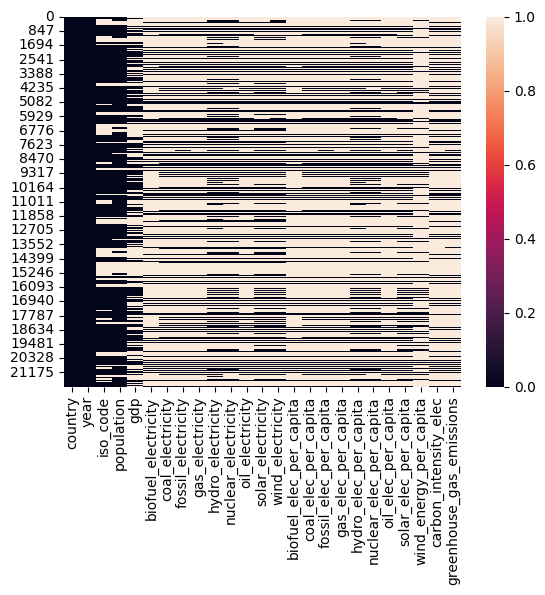

In [40]:
sns.heatmap(df_analysis.isnull())

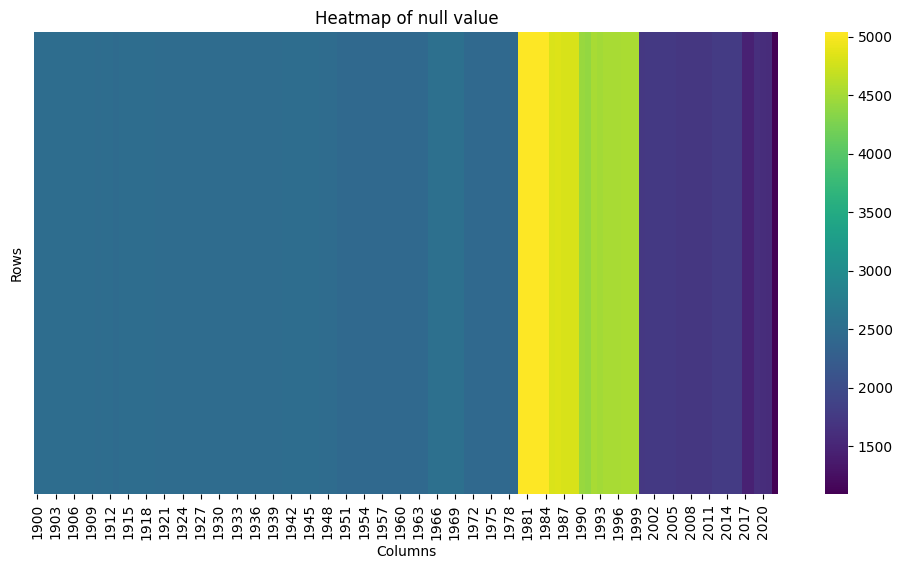

In [41]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_analysis.isnull().groupby(df_analysis["year"]).sum().sum(axis=1).to_frame().T, cmap="viridis", cbar=True, yticklabels=False)
plt.title("Heatmap of null value")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

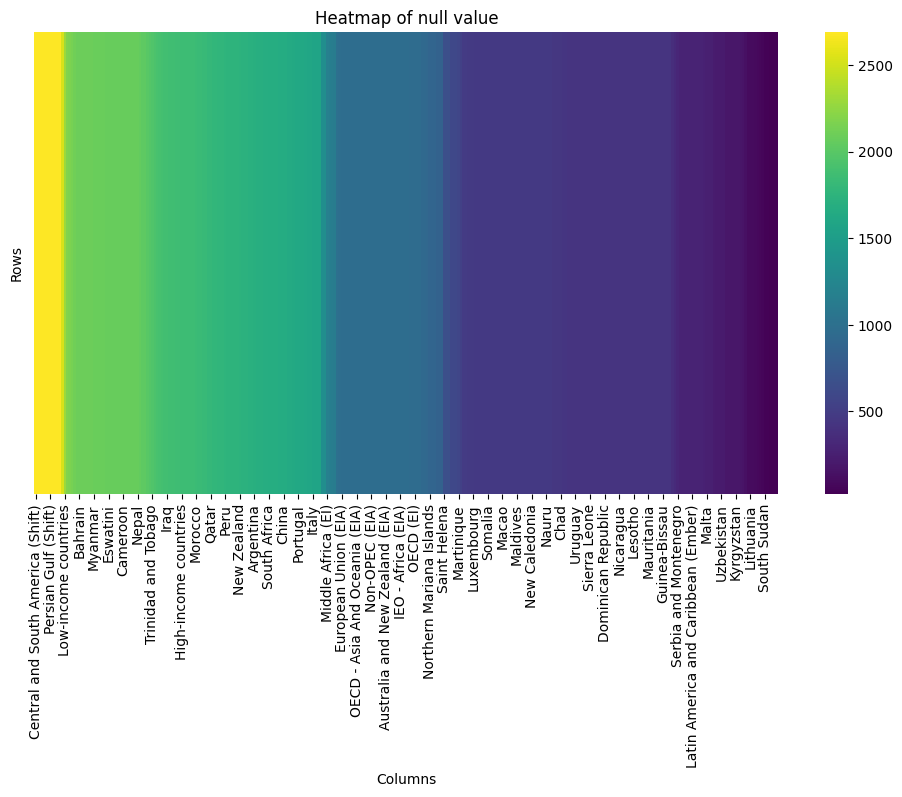

In [42]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_analysis.isnull().groupby(df_analysis["country"]).sum().sum(axis=1).sort_values(ascending=False).to_frame().T, cmap="viridis", cbar=True, yticklabels=False)
plt.title("Heatmap of null value")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

Lets first check the pourcentage of null value per column

In [43]:
null_per_column = (df_analysis.isnull().sum() / df_analysis.shape[0] ) * 100
null_per_column

country                      0.000000
year                         0.000000
iso_code                    24.986371
population                  17.667636
gdp                         49.513902
biofuel_electricity         74.890969
coal_electricity            70.725059
fossil_electricity          70.243504
gas_electricity             70.725059
hydro_electricity           59.640196
nuclear_electricity         61.312012
oil_electricity             70.725059
solar_electricity           63.856079
wind_electricity            63.674359
biofuel_elec_per_capita     76.035799
coal_elec_per_capita        73.423587
fossil_elec_per_capita      72.942032
gas_elec_per_capita         73.423587
hydro_elec_per_capita       64.210431
nuclear_elec_per_capita     65.259858
oil_elec_per_capita         73.423587
solar_elec_per_capita       68.058332
wind_energy_per_capita      81.532800
carbon_intensity_elec       76.535526
greenhouse_gas_emissions    75.894966
dtype: float64

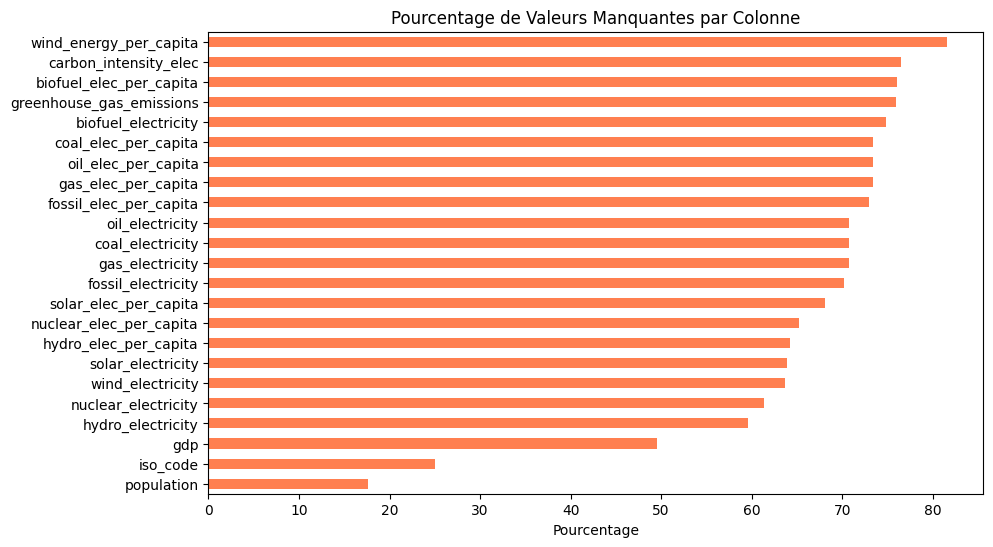

In [44]:
missing_percentages = df_analysis.isnull().mean() * 100
missing_percentages = missing_percentages[missing_percentages > 0]
missing_percentages.sort_values(inplace=True)

missing_percentages.plot(kind='barh', color='coral', figsize=(10, 6))
plt.title("Pourcentage de Valeurs Manquantes par Colonne")
plt.xlabel("Pourcentage")
plt.show()

We can see that we have a lot a column with more than 50% of null value which mean that we have a lot of missing values in our dataset.This can be explain by the lack of data of certain country for certain year which is totally normal. We can also see that we have a lot of country which are a group of country or continent. We will try to clean them so that we only have the raw data.

In [45]:
for country in df_analysis["country"].unique():
    print(country)

ASEAN (Ember)
Afghanistan
Africa
Africa (EI)
Africa (Ember)
Africa (Shift)
Albania
Algeria
American Samoa
Angola
Antarctica
Antigua and Barbuda
Argentina
Armenia
Aruba
Asia
Asia & Oceania (EIA)
Asia (Ember)
Asia Pacific (EI)
Asia and Oceania (Shift)
Australia
Australia and New Zealand (EIA)
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
CIS (EI)
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central & South America (EIA)
Central African Republic
Central America (EI)
Central and South America (Shift)
Chad
Chile
China
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Czechoslovakia
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
EU28 (Shift)
East Germany (EIA)
East Timor
Eastern Africa (EI)
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethio

In [46]:
country_to_delete = [
    "Africa",
    "Asia",
    "Europe",
    "Oceania",
    "World",
    "North America",
    "Lower-middle-income countries",
    "Low-income countries",
    "High-income countries",
    "Serbia and Montenegro",
    "South America",
    "USSR",
    "Upper-middle-income countries"
    # And the one with a () in them
]
df_analysis = df_analysis[~df_analysis["country"].isin(country_to_delete) & ~df_analysis["country"].str.contains(r"\(|\)", regex=True)]
for country in df_analysis["country"].unique():
    print(country)

Afghanistan
Albania
Algeria
American Samoa
Angola
Antarctica
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Czechoslovakia
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
East Timor
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Falkland Islands
Faroe Islands
Fiji
Finland
France
French Guiana
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guadeloupe
Guam
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kaza

Now lets observe our data on a real map. First lets check the country that are not in the world map (no iso code)

In [47]:
df_analysis[df_analysis["iso_code"].isnull()]["country"].unique()

array(['Czechoslovakia', 'Kosovo', 'Yugoslavia'], dtype=object)

We can see that only a few don't have it so we will ignore it. Now lets plot our data on a map so that we can easely visualise them.

In [48]:
output = widgets.Output()

column_to_exclude = [
    "country",
    "year",
    "iso_code",
    "population",
    "gdp"
]

available_columns = [
    col for col in df_analysis.select_dtypes(include=['number']).columns.tolist()
    if col not in column_to_exclude
]

column_selector = widgets.Dropdown(
    options=available_columns,
    value="coal_electricity" if "coal_electricity" in available_columns else available_columns[0], 
    description="Select a column for the map: ",
    style={'description_width': 'initial'}
)

def get_valid_years(df, column):
    """All year after the first one where there is a non null value in the column given"""
    if column in df.columns:
        valid_years = df[df[column].notna()]["year"].unique()
        if len(valid_years) > 0:
            min_valid_year = min(valid_years)
            return sorted(df[df["year"] >= min_valid_year]["year"].unique())
    return sorted(df["year"].dropna().unique())

def update_map(change):
    """Update map and delete old display"""
    with output:
        clear_output() 
        
        column = column_selector.value
        years_available = get_valid_years(df_analysis, column)
        year_selected = years_available[-1] 

        # Create map
        fig = px.choropleth(
            df_analysis[df_analysis["year"] == year_selected],
            locations="iso_code",
            color=column,
            hover_name="country",
            color_continuous_scale="YlOrRd",
            range_color=(df_analysis[column].min(), df_analysis[column].max()),
            projection="natural earth",
            title=f"{column} ({year_selected})",
            locationmode="ISO-3"
        )

        fig.update_layout(
            width=1000,  
            height=600, 
            margin={"r":0, "t":50, "l":0, "b":0}  
        )

        # Create year slide
        fig.update_layout(
            sliders=[{
                "active": years_available.index(year_selected),
                "yanchor": "top",
                "xanchor": "left",
                "currentvalue": {"prefix": "Année : ", "font": {"size": 20}},
                "pad": {"b": 10, "t": 50},
                "len": 0.9,
                "x": 0.1,
                "y": 0,
                "steps": [
                    {
                        "args": [
                            {"z": [df_analysis[df_analysis["year"] == year][column].values],
                             "locations": [df_analysis[df_analysis["year"] == year]["iso_code"].values],
                             "text": [df_analysis[df_analysis["year"] == year]["country"].values]},
                            {"title.text": f"{column} ({year})"}
                        ],
                        "label": str(year),
                        "method": "update"
                    }
                    for year in years_available
                ]
            }]
        )

        display(fig)

column_selector.observe(update_map, names="value")

display(column_selector, output)

update_map(None)

Dropdown(description='Select a column for the map: ', index=1, options=('biofuel_electricity', 'coal_electrici…

Output()

In [49]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import threading
import time

# Charger les données (Assurez-vous que df_analysis est défini)
df = df_analysis.copy()

# Exclure certaines colonnes
column_to_exclude = ["country", "year", "iso_code", "population", "gdp"]

available_columns = [
    col for col in df.select_dtypes(include=['number']).columns.tolist()
    if col not in column_to_exclude
]

# Fonction pour obtenir les années valides (avec au moins une valeur non nulle)
def get_valid_years(df, column):
    valid_years = df[df[column].notna()]["year"].unique()
    if len(valid_years) > 0:
        min_valid_year = min(valid_years)
        return sorted(df[df["year"] >= min_valid_year]["year"].unique())
    return sorted(df["year"].dropna().unique())

# Initialiser l'application Dash
app2 = dash.Dash(__name__)

app2.layout = html.Div([
    html.H1("Carte interactive des sources d'énergie"),
    
    dcc.Dropdown(
        id='column-selector',
        options=[{'label': col, 'value': col} for col in available_columns],
        value=available_columns[0],
        clearable=False,
        style={'width': '50%'}
    ),
    
    dcc.Graph(id='map-graph')
])

@app2.callback(
    Output('map-graph', 'figure'),
    [Input('column-selector', 'value')]
)
def update_map(selected_column):
    years_available = get_valid_years(df, selected_column)
    if not years_available:
        return px.choropleth(title="Aucune donnée disponible")
    
    year_selected = years_available[-1]
    filtered_df = df[df['year'] == year_selected]
    
    if filtered_df.empty:
        return px.choropleth(title="Aucune donnée disponible")
    
    fig = px.choropleth(
        filtered_df,
        locations="iso_code",
        color=selected_column,
        hover_name="country",
        color_continuous_scale="YlOrRd",
        range_color=(df[selected_column].min(), df[selected_column].max()),
        projection="natural earth",
        title=f"{selected_column} ({year_selected})",
        locationmode="ISO-3"
    )

    fig.update_layout(
        width=1000,
        height=600,
        margin={"r": 0, "t": 50, "l": 0, "b": 0},
        sliders=[{
            "active": years_available.index(year_selected),
            "yanchor": "top",
            "xanchor": "left",
            "currentvalue": {"prefix": "Année : ", "font": {"size": 20}},
            "pad": {"b": 10, "t": 50},
            "len": 0.9,
            "x": 0.1,
            "y": 0,
            "steps": [
                {
                    "args": [
                        {"z": [df[df["year"] == year][selected_column].values],
                         "locations": [df[df["year"] == year]["iso_code"].values],
                         "text": [df[df["year"] == year]["country"].values]},
                        {"title.text": f"{selected_column} ({year})"}
                    ],
                    "label": str(year),
                    "method": "update"
                }
                for year in years_available
            ]
        }]
    )
    
    return fig
time.sleep(5)
app2.run_server(port=8060, debug=True)



From the map, we can observe that the high number of missing values is expected. Many countries lack data for several years (thats why some column start at 1985 and other earlier), depending on the selected column. This variation makes it difficult to ensure complete data coverage across all years. Therefore, for our analysis, we will keep the missing values as they are and begin our study from the first year where all selected columns have complete data.

In [63]:
import dash
from dash import dcc, html, Output, Input
import plotly.graph_objects as go
import pandas as pd

# Exemple de DataFrame (remplace-le par df_analysis)
df = df_analysis.copy()

# Pays cochés par défaut
default_countries = ["France", "Germany", "India", "Japan", "United States", "Saudi Arabia", "United Kingdom"]

# Liste des variables disponibles
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
numeric_columns.remove("year")  # On enlève 'year' car c'est l'axe X

# Création de l'application Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Évolution des variables énergétiques par pays", style={"textAlign": "center"}),

    # Liste déroulante multi-sélection pour choisir les pays
    html.Label("Sélectionner les pays :", style={"fontWeight": "bold"}),
    dcc.Dropdown(
        id="country-selector",
        options=[{"label": country, "value": country} for country in df["country"].unique()],
        value=default_countries,  # Pays sélectionnés par défaut
        multi=True,
        placeholder="Choisissez des pays..."
    ),

    # Dropdown pour choisir la variable
    html.Label("Choisir une variable :", style={"fontWeight": "bold", "marginTop": "10px"}),
    dcc.Dropdown(
        id="variable-selector",
        options=[{"label": col, "value": col} for col in numeric_columns],
        value=numeric_columns[0],
        clearable=False
    ),

    # Graphique interactif
    dcc.Graph(id="line-chart")
])

@app.callback(
    Output("line-chart", "figure"),
    [Input("variable-selector", "value"),
     Input("country-selector", "value")]
)
def update_graph(selected_variable, selected_countries):
    fig = go.Figure()
    
    for country in selected_countries:
        country_data = df[df["country"] == country]
        fig.add_trace(go.Scatter(
            x=country_data["year"],
            y=country_data[selected_variable],
            mode="lines",
            name=country
        ))

    fig.update_layout(
        title=f"Évolution de {selected_variable} par pays",
        xaxis_title="Année",
        yaxis_title=selected_variable,
        template="plotly_dark"
    )
    
    return fig

if __name__ == "__main__":
    app.run_server(debug=True, port=8050)


In [51]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Copie du DataFrame
DF = df_analysis.copy()

# Liste des sources d'énergie
Parse = ['coal_electricity', 'oil_electricity', 'gas_electricity', 
         'hydro_electricity', 'nuclear_electricity', 'wind_electricity', 'solar_electricity']

# Calcul du total de l'électricité produite
DF['total'] = DF[Parse].sum(axis=1)
display(DF[['year','country','total']])  

,year,country,total
23,1900,Afghanistan,0.00
24,1901,Afghanistan,0.00
25,1902,Afghanistan,0.00
26,1903,Afghanistan,0.00
27,1904,Afghanistan,0.00
...,...,...,...
22007,2018,Zimbabwe,8.80
22008,2019,Zimbabwe,7.86
22009,2020,Zimbabwe,7.24
22010,2021,Zimbabwe,7.65


In [52]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

DF = df_analysis.copy()

Parse = ['coal_electricity', 'oil_electricity', 'gas_electricity', 
         'hydro_electricity', 'nuclear_electricity', 'wind_electricity', 'solar_electricity']


for source in Parse:
    if source not in DF.columns:
        DF[source] = 0 


DF["total"] = DF[Parse].sum(axis=1)


for source in Parse:
    DF[f"{source}%"] = DF[source] / DF["total"] * 100
DF.fillna(0, inplace=True)  # Remplace les NaN par 0

all_countries = sorted(DF["country"].dropna().unique())


default_country = "France"


def get_valid_years(df, country):
    """Retourne les années où le pays a au moins une valeur non-nulle dans une des colonnes d'énergie."""
    filtered_df = df[df["country"] == country]
    valid_years = filtered_df[
        filtered_df[[f"{source}%" for source in Parse]].sum(axis=1) > 0  
    ]["year"].unique()
    
    return sorted(valid_years) if len(valid_years) > 0 else []


available_years = get_valid_years(DF, default_country)
default_year = available_years[0] if available_years else None


app3 = dash.Dash(__name__)

app3.layout = html.Div([
    html.H1("Mix Énergétique par Pays et Année", style={"textAlign": "center"}),

    
    html.Label("Choisir un pays:", style={"font-weight": "bold"}),
    dcc.Dropdown(
        id="country-dropdown",
        options=[{"label": country, "value": country} for country in all_countries],
        value=default_country,
        clearable=False
    ),

    
    html.Label("Choisir une année:", style={"font-weight": "bold", "margin-top": "20px"}),
    dcc.Slider(
        id="year-slider",
        step=1
    ),

    dcc.Graph(id="energy-mix-pie")
])


@app3.callback(
    Output("year-slider", "marks"),
    Output("year-slider", "min"),
    Output("year-slider", "max"),
    Output("year-slider", "value"),
    Input("country-dropdown", "value")
)
def update_year_slider(selected_country):
    """Met à jour le slider des années en fonction du pays sélectionné et filtre les années vides."""
    valid_years = get_valid_years(DF, selected_country)

    if not valid_years:
        return {}, None, None, None  

    return (
        {str(year): str(year) for year in valid_years}, 
        valid_years[0],  
        valid_years[-1],  
        valid_years[0]  
    )


@app3.callback(
    Output("energy-mix-pie", "figure"),
    Input("country-dropdown", "value"),
    Input("year-slider", "value")
)
def update_pie(selected_country, selected_year):
    """Met à jour le Pie Chart en fonction du pays et de l'année sélectionnés."""
    filtered_data = DF[(DF["country"] == selected_country) & (DF["year"] == selected_year)]

    # Vérification s'il y a des données
    if filtered_data.empty or filtered_data[[f"{source}%" for source in Parse]].sum(axis=1).values[0] == 0:
        fig = px.pie(
            names=["Aucune donnée"],
            values=[1],
            title=f"Aucune donnée pour {selected_country} en {selected_year}",
            color_discrete_sequence=["gray"]
        )
    else:
        fig = px.pie(
            names=Parse,
            values=[filtered_data[f"{source}%"].values[0] for source in Parse],
            title=f"Mix énergétique de {selected_country} en {selected_year} (%)",
            color_discrete_sequence=px.colors.qualitative.Set2
        )

    return fig

# --- LANCEMENT DE L'APPLICATION ---
time.sleep(5)
def run_dash_app3():
    app3.run_server(port=8051, debug=True, use_reloader=False)

thread3 = threading.Thread(target=run_dash_app3)
thread3.start()



# Models and Evaluation
***

For the following step we will use time series prediction for france. Firstly we will check the missing values with france data

<AxesSubplot: >

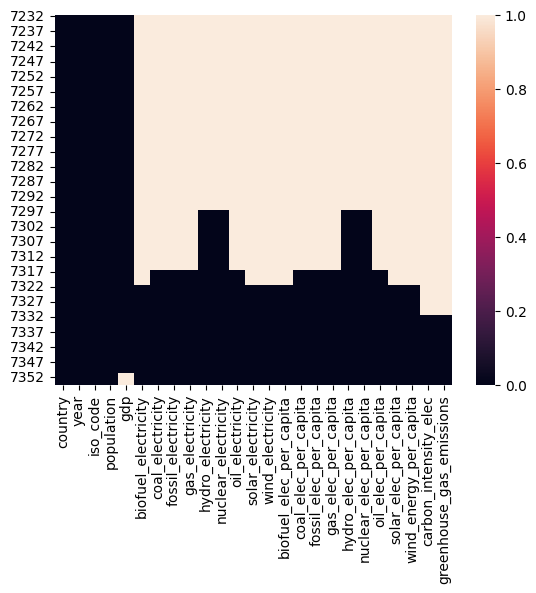

In [53]:
sns.heatmap(df_analysis[df_analysis["country"]=="France"].isnull())

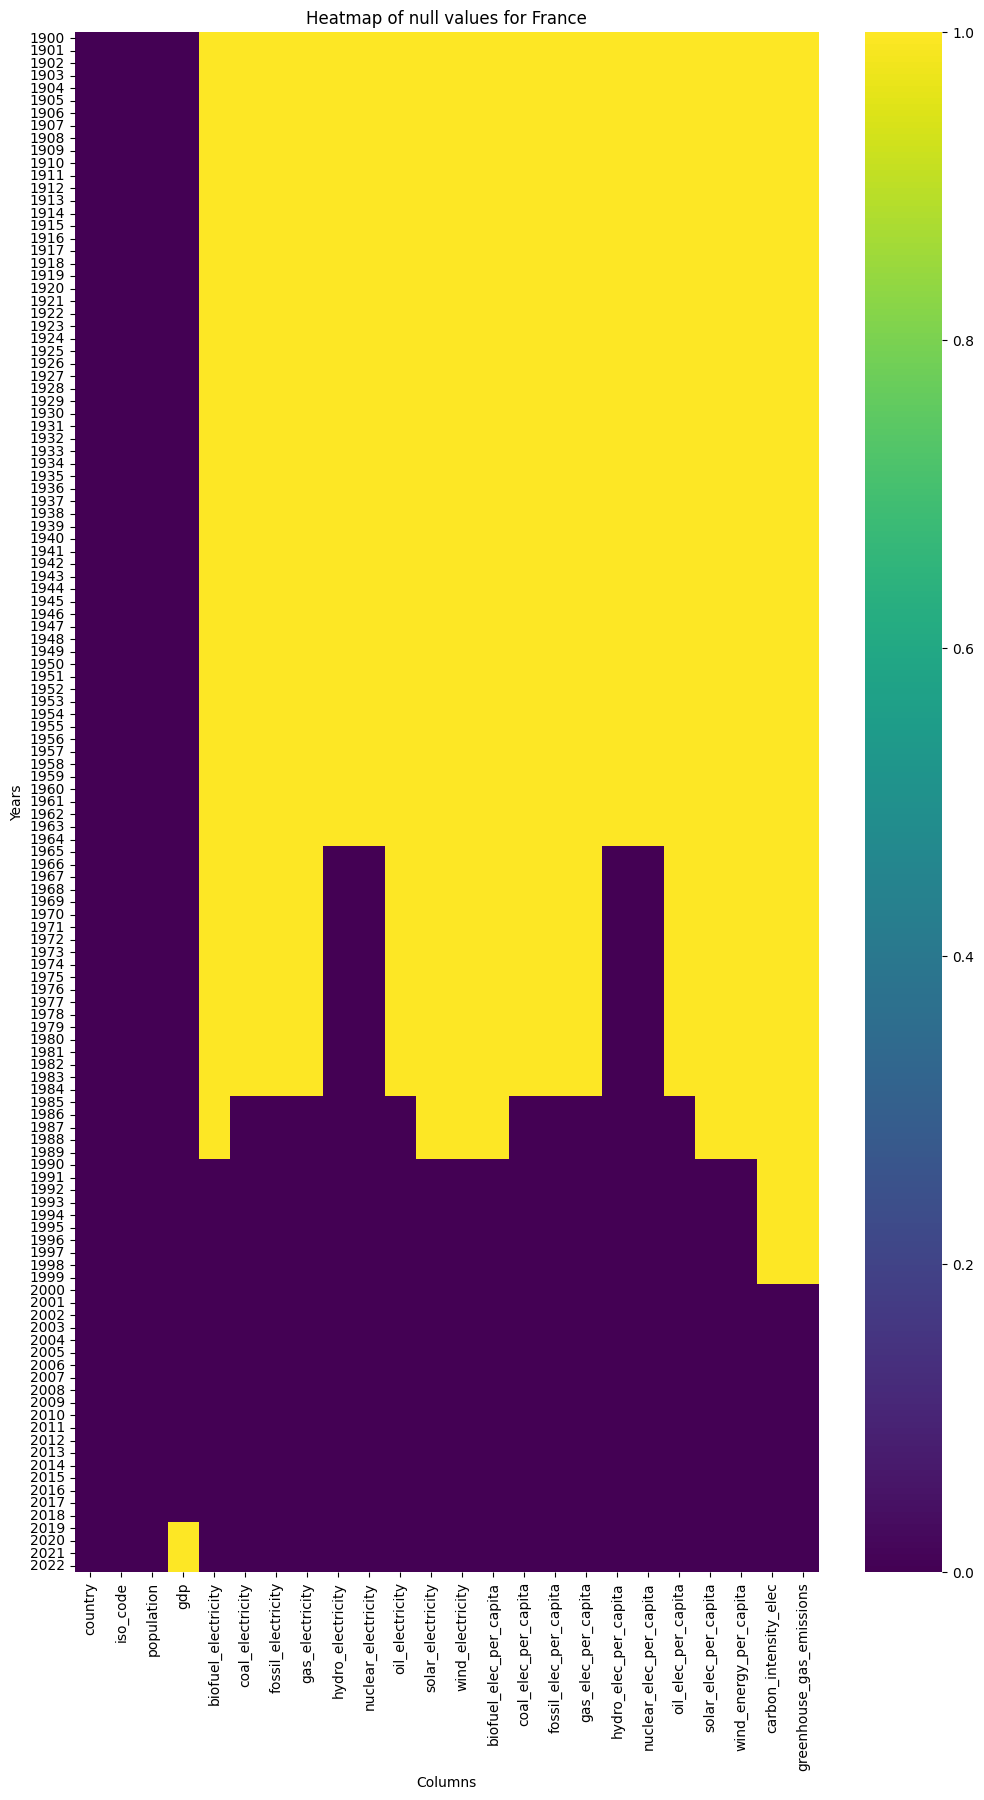

In [54]:
df_fr = df_analysis[df_analysis["country"]=="France"].copy()
plt.figure(figsize=(12, 20))
sns.heatmap(df_fr.set_index("year").isnull(), cmap="viridis", cbar=True, yticklabels=True)
plt.ylabel("Years")
plt.title("Heatmap of null values for France")
plt.xlabel("Columns")
plt.show()

We will only take the information after 1964 because before we don't have any.

In [55]:

df_fr=df_fr[df_fr["year"]>1964].copy()

In [62]:
import dash
from dash import dcc, html, Output, Input
import plotly.graph_objects as go
import pandas as pd

# Exemple de DataFrame (remplace-le par df_analysis)
df = df_fr.copy()

# Pays cochés par défaut
default_countries = ["France"]

# Liste des variables disponibles
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
numeric_columns.remove("year")  # On enlève 'year' car c'est l'axe X

# Création de l'application Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Évolution des variables énergétiques par pays", style={"textAlign": "center"}),

    # Liste déroulante multi-sélection pour choisir les pays
    html.Label("Sélectionner les pays :", style={"fontWeight": "bold"}),
    dcc.Dropdown(
        id="country-selector",
        options=[{"label": country, "value": country} for country in df["country"].unique()],
        value=default_countries,  # Pays sélectionnés par défaut
        multi=True,
        placeholder="Choisissez des pays..."
    ),

    # Dropdown pour choisir la variable
    html.Label("Choisir une variable :", style={"fontWeight": "bold", "marginTop": "10px"}),
    dcc.Dropdown(
        id="variable-selector",
        options=[{"label": col, "value": col} for col in numeric_columns],
        value=numeric_columns[0],
        clearable=False
    ),

    # Graphique interactif
    dcc.Graph(id="line-chart")
])

@app.callback(
    Output("line-chart", "figure"),
    [Input("variable-selector", "value"),
     Input("country-selector", "value")]
)
def update_graph(selected_variable, selected_countries):
    fig = go.Figure()
    
    for country in selected_countries:
        country_data = df[df["country"] == country]
        fig.add_trace(go.Scatter(
            x=country_data["year"],
            y=country_data[selected_variable],
            mode="lines",
            name=country
        ))

    fig.update_layout(
        title=f"Évolution de {selected_variable} par pays",
        xaxis_title="Année",
        yaxis_title=selected_variable,
        template="plotly_dark"
    )
    
    return fig

if __name__ == "__main__":
    app.run_server(debug=True, port=8050)


KeyError: 'country'

For the moment I'll use KNNImputer but we will change it because it's not very 

In [57]:
from sklearn.impute import KNNImputer

df_fr.drop(columns=["country", "iso_code"],inplace=True)
imputer = KNNImputer(n_neighbors=5)
df_fr_imputed = imputer.fit_transform(df_fr)
df_fr_imputed = pd.DataFrame(df_fr_imputed, columns=df_fr.columns)
df_fr_imputed

,year,population,gdp,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,...,coal_elec_per_capita,fossil_elec_per_capita,gas_elec_per_capita,hydro_elec_per_capita,nuclear_elec_per_capita,oil_elec_per_capita,solar_elec_per_capita,wind_energy_per_capita,carbon_intensity_elec,greenhouse_gas_emissions
0,1965.0,48168800.0,7.275574e+11,7.686,11.6026,51.8036,30.8206,46.881,0.897,9.3804,...,201.7716,830.3398,479.4168,973.267,18.622,149.1512,190.6248,1212.0734,73.8808,38.916
1,1966.0,48683088.0,7.645141e+11,7.686,11.6026,51.8036,30.8206,52.208,1.395,9.3804,...,201.7716,830.3398,479.4168,1072.415,28.655,149.1512,190.6248,1212.0734,73.8808,38.916
2,1967.0,49181404.0,7.998648e+11,7.686,11.6026,51.8036,30.8206,45.378,2.076,9.3804,...,201.7716,830.3398,479.4168,922.659,42.211,149.1512,190.6248,1212.0734,73.8808,38.916
3,1968.0,49647272.0,8.351714e+11,7.686,11.6026,51.8036,30.8206,50.423,3.085,9.3804,...,201.7716,830.3398,479.4168,1015.617,62.138,149.1512,190.6248,1212.0734,73.8808,38.916
4,1969.0,50087056.0,8.931074e+11,7.686,11.6026,51.8036,30.8206,52.942,3.600,9.3804,...,201.7716,830.3398,479.4168,1057.001,71.875,149.1512,190.6248,1212.0734,73.8808,38.916
5,1970.0,50523588.0,9.442327e+11,7.686,11.6026,51.8036,30.8206,56.681,5.711,9.3804,...,201.7716,830.3398,479.4168,1121.882,113.036,149.1512,190.6248,1212.0734,73.8808,38.916
6,1971.0,50970696.0,9.899686e+11,7.686,11.6026,51.8036,30.8206,48.857,9.329,9.3804,...,201.7716,830.3398,479.4168,958.526,183.027,149.1512,190.6248,1212.0734,73.8808,38.916
7,1972.0,51410364.0,1.034025e+12,7.686,11.6026,51.8036,30.8206,48.831,14.591,9.3804,...,201.7716,830.3398,479.4168,949.837,283.814,149.1512,190.6248,1212.0734,73.8808,38.916
8,1973.0,51814076.0,1.090180e+12,7.686,11.6026,51.8036,30.8206,47.696,14.751,9.3804,...,201.7716,830.3398,479.4168,920.527,284.691,149.1512,190.6248,1212.0734,73.8808,38.916
9,1974.0,52163552.0,1.122228e+12,7.686,11.6026,51.8036,30.8206,56.230,14.710,9.3804,...,201.7716,830.3398,479.4168,1077.961,281.998,149.1512,190.6248,1212.0734,73.8808,38.916


In [58]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd



# Initialisation de l'imputeur avec RandomForestRegressor
imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=20), random_state=42)

# Application de l'imputation
df_fr_imputed = imputer.fit_transform(df_fr)

# Conversion en DataFrame avec les mêmes colonnes
df_fr_imputed = pd.DataFrame(df_fr_imputed, columns=df_fr.columns)

df_fr_imputed


,year,population,gdp,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,...,coal_elec_per_capita,fossil_elec_per_capita,gas_elec_per_capita,hydro_elec_per_capita,nuclear_elec_per_capita,oil_elec_per_capita,solar_elec_per_capita,wind_energy_per_capita,carbon_intensity_elec,greenhouse_gas_emissions
0,1965.0,48168800.0,7.275574e+11,2.4575,21.61000,50.24060,4.87090,46.881,0.897,7.52095,...,365.33885,857.02105,108.10155,973.267,18.622,133.51060,0.68705,97.76460,77.89165,42.3720
1,1966.0,48683088.0,7.645141e+11,2.2475,22.93745,40.36515,2.89505,52.208,1.395,6.82620,...,372.56525,696.91920,52.65890,1072.415,28.655,122.46550,0.67880,97.71815,67.72850,38.8450
2,1967.0,49181404.0,7.998648e+11,2.4930,21.64950,50.40310,4.87090,45.378,2.076,7.52095,...,366.35590,854.75235,108.10155,922.659,42.211,133.51060,0.68705,107.12800,79.42200,42.5250
3,1968.0,49647272.0,8.351714e+11,2.3675,22.69795,40.56095,3.88360,50.423,3.085,7.43970,...,372.07230,700.33680,85.40710,1015.617,62.138,134.34500,0.67880,97.77605,67.72850,38.8450
4,1969.0,50087056.0,8.931074e+11,2.2475,22.93745,40.36515,3.00905,52.942,3.600,6.82620,...,372.56525,696.91920,52.65890,1057.001,71.875,126.08070,0.67880,97.71815,67.27125,38.8450
5,1970.0,50523588.0,9.442327e+11,2.2475,22.80295,40.38485,2.87435,56.681,5.711,6.76155,...,372.56525,720.94130,50.85020,1121.882,113.036,122.46550,0.67880,93.56425,67.27125,38.8450
6,1971.0,50970696.0,9.899686e+11,2.4575,21.61000,49.58550,4.87090,48.857,9.329,7.52095,...,366.27385,857.02105,108.10155,958.526,183.027,133.78235,0.68705,97.76460,77.44035,42.1750
7,1972.0,51410364.0,1.034025e+12,2.4575,21.64950,50.63040,4.87090,48.831,14.591,7.52095,...,365.93470,857.02105,108.10155,949.837,283.814,133.51060,0.68705,97.85710,79.22850,42.5250
8,1973.0,51814076.0,1.090180e+12,2.4930,21.64950,50.40310,4.87090,47.696,14.751,7.52095,...,366.35590,857.02105,108.10155,920.527,284.691,133.51060,0.68705,107.12800,79.42200,42.5250
9,1974.0,52163552.0,1.122228e+12,2.2475,22.93745,40.36515,2.89505,56.230,14.710,6.82620,...,372.56525,696.91920,52.58510,1077.961,281.998,122.46550,0.67880,97.71815,67.27125,38.8450


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Charger les données (assuming df_fr exists)
df = df_fr.copy()

# Exclure les colonnes non numériques et 'year'
variables_to_predict = [col for col in df.columns if col not in ["year"]]

# Stockage des résultats
metrics = []

# Boucle sur chaque variable
for target_variable in variables_to_predict:
    print(f"\n🔍 Prédiction pour {target_variable}...")

    # Préparer les données
    df_prophet = df[["year", target_variable]].dropna().copy()
    df_prophet.rename(columns={"year": "ds", target_variable: "y"}, inplace=True)

    # Vérifier s'il y a assez de données
    if len(df_prophet) < 10:
        print(f"⚠️ Pas assez de données pour {target_variable}, on passe à la suivante.")
        continue

    # Séparation Train/Test (80% Train - 20% Test)
    split_index = int(len(df_prophet) * 0.8)
    df_train = df_prophet.iloc[:split_index]
    df_test = df_prophet.iloc[split_index:].copy()

    # Initialisation et entraînement du modèle Prophet
    model = Prophet(interval_width=0.95)  # Default backend (CmdStanPy in newer versions)
    model.fit(df_train)

    # Prédiction sur la période du test
    future = df_test[["ds"]]
    forecast = model.predict(future)

    # Ajouter les prédictions dans le test set
    df_test.loc[:, "yhat"] = forecast["yhat"].values

    # Évaluer la performance du modèle
    mae = mean_absolute_error(df_test["y"], df_test["yhat"])
    rmse = np.sqrt(mean_squared_error(df_test["y"], df_test["yhat"]))

    print(f"📊 Évaluation pour {target_variable} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

    # Stocker les résultats
    metrics.append({"Variable": target_variable, "MAE": mae, "RMSE": rmse})

    # Affichage des résultats
    plt.figure(figsize=(10, 5))
    plt.plot(df_train["ds"], df_train["y"], label="Train", color="blue")
    plt.plot(df_test["ds"], df_test["yhat"], label="Prédiction", color="red", linestyle="dashed")
    plt.xlabel("Année")
    plt.ylabel(target_variable)
    plt.title(f"Prédiction avec Prophet pour {target_variable}")
    plt.legend()
    plt.grid()
    plt.show()

# Conversion des résultats en DataFrame et affichage
metrics_df = pd.DataFrame(metrics)
print("\n📈 Résumé des performances :")
print(metrics_df)




# Conclusion
***